In [1]:
%matplotlib inline

import os
import typing
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
os.getcwd()

'/home/dima/UCU/ReinforcementLearning/Repos/ReinforcementLearning'

In [3]:
from diploma.noise_learning.utils import NoiseLearningAgents, ExchangeTypes
from diploma.noise_learning.visualizer import Visualizer
from diploma.noise_learning.metrics_manager import AgentMetrics, Metrics

In [4]:
agents_number = 10
env_name = 'CartPole-v1'
agent = NoiseLearningAgents['A2C']
noise_env_step = 0.1

exchange_type = ExchangeTypes['SMART']
exchange_delta = 0.1
exchange_items_reward_count = 30

detailed_agents_plots = False
metrics_number_of_elements = 100
metrics_number_of_iterations = 50

executions_count = None
executions_from = None
execution_date = None

In [5]:
visualizer = Visualizer(
    exchange_type=exchange_type, exchange_delta=exchange_delta, exchange_items_reward_count=exchange_items_reward_count, 
    agents_number=agents_number, env_name=env_name, noise_learning_agent=agent, metrics_number_of_elements=metrics_number_of_elements, 
    metrics_number_of_iterations=metrics_number_of_iterations, detailed_agents_plots=detailed_agents_plots, 
    noise_env_step=noise_env_step, executions_count=executions_count, executions_from=executions_from, execution_date=execution_date
)

In [6]:
visualizer.set_train_metrics()
visualizer.set_play_metrics()

01-07_15-41-25_A2C_SMART_5/agent9.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent0.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent1.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent2.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent3.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent4.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent5.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent6.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent7.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent8.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_6/agent9.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_7/agent0.txt results
Loaded diploma/temp_results/2020-01-07_15-41-25_A2C_SMART_7/agent1.txt results
Loaded

In [7]:
train_metrics: typing.List[AgentMetrics] = visualizer.agent_metrics
play_metrics: typing.List[AgentMetrics] = visualizer.agent_play_metrics

In [8]:
def get_all_metrics(metrics: typing.List[AgentMetrics], metric_name: str) -> Metrics:
    all_metrics: Metrics = Metrics()
    for i in range(len(metrics)):
        all_metrics.extend(getattr(metrics[i], metric_name))
    return all_metrics

In [9]:
all_train_scores = get_all_metrics(train_metrics, 'scores')
all_play_scores = get_all_metrics(play_metrics, 'scores')

In [10]:
def print_iteration_mean(all_scores: Metrics, start: int, end: int, step: int):
    scores = [metric.value for metric in all_scores.metrics if metric.iteration == start]
    print(f"Mean at {start} iteration: {np.array(scores).mean()}")
    for i in range(step, end, step):
        scores = [metric.value for metric in all_scores.metrics if metric.iteration == i]
        print(f"Mean at {i} iteration: {np.array(scores).mean()}")

In [11]:
print("Train scores:")
print_iteration_mean(all_train_scores, 1, 5500, 500)

Train scores:
Mean at 1 iteration: 21.34
Mean at 500 iteration: 233.38
Mean at 1000 iteration: 352.23
Mean at 1500 iteration: 389.41
Mean at 2000 iteration: 409.56
Mean at 2500 iteration: 413.71
Mean at 3000 iteration: 409.78
Mean at 3500 iteration: 440.92
Mean at 4000 iteration: 435.61
Mean at 4500 iteration: 424.25
Mean at 5000 iteration: 442.57


In [12]:
print("Play scores:")
print_iteration_mean(all_play_scores, 1, 600, 100)

Play scores:
Mean at 1 iteration: 488.04
Mean at 100 iteration: 487.1
Mean at 200 iteration: 486.41
Mean at 300 iteration: 486.71
Mean at 400 iteration: 487.06
Mean at 500 iteration: 485.46


In [13]:
%matplotlib inline

def print_stats(all_scores: Metrics):
    scores = np.array([metric.value for metric in all_scores.metrics])
    print(f"{stats.describe(scores)}")
    print(f"Std dev: {np.std(scores)}")
    plt.hist(scores)
    plt.show()

Train stats:
DescribeResult(nobs=500000, minmax=(8.0, 500.0), mean=367.187784, variance=31360.906318981983, skewness=-0.8500900646968377, kurtosis=-0.9273882872972989)
Std dev: 177.08993081812795


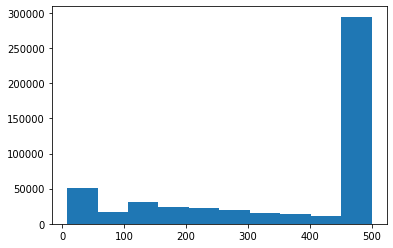

In [14]:
print("Train stats:")
print_stats(all_train_scores)

Play stats:
DescribeResult(nobs=50000, minmax=(154.0, 500.0), mean=486.76006, variance=2471.9762483213663, skewness=-4.047344755854238, kurtosis=16.445111525661446)
Std dev: 49.71847552767884


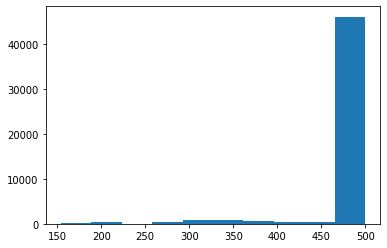

In [15]:
print("Play stats:")
print_stats(all_play_scores)